# Information Retrieval in High Dimensional Data
## Assignment 1 
### Group 18 Team Members:
Chen Liang<br> 
Choong Wei Herng<br> 
Glaser Matthias<br> 
Hils Manuel<br> 
Skhiri Oussama<br> 
Totikos Nektarios<br>  

$
\DeclareMathOperator{\Prob}{Pr}
\renewcommand{\vec}[1]{{\underline{#1}}}
\newcommand{\dott}[2]{{{#1}^T{#2}}}
\newcommand{\mat}[1]{{\mathbf{#1}}}
$

### Curse of Dimensionality 
### Task 1
#### Part 1
Let $C_d = \{\textbf{x}∈\mathbb{R}^p\ | \Vert{\textbf{x} \|_\infty \leq \frac{d}{2}}\}$
denote the $p$-dimensional hypercube of edge length $d$, centered at the origin. It is assumed that $X$ is uniformly distributed in $C_1$.

In order to determine $d$ in dependence of $p$ and $q$∈$[0,1]$, such that $P_r(X ∈ C_d)=q$ holds, there are three cases of $d$ that need to be considered.

$\textbf{(1)}$ If $d=1$, one can derive the density function as

$\begin{equation}
p_X(x) = 
 \begin{cases} 
      k & \textbf{x} \in C_1 \\
      0 & \textbf{x} \notin C_1 
 \end{cases}
\end{equation}$
, where $k$ denotes a constant.

Since $X$ is uniformly distributed in $C_1$ and the hypercube is centered at the origin, the integral over $p_X(x)$ computes $k$ and is simply

$P_r(X ∈ C_1) = \int\limits_{\mathbb{R}^p} p_X(x) \ dx = \underbrace{\int\limits_{-1/2}^{1/2} ... \int\limits_{-1/2}^{1/2}}_{p-dim} p_X(x) \ \underbrace{dx_1 ... dx_p}_{p-dim} = 1.$

Thus, the density function for $d=1$ is given by 
$\begin{equation}
p_X(x) = 
 \begin{cases} 
      1 & \textbf{x} \in C_1 \\
      0 & \textbf{x} \notin C_1 
 \end{cases}
\end{equation}$.

$\textbf{(2)}$ If $d\geq1$, then $C_d$ contains $C_1$. 

The probability that $X$ takes values in $C_d$ is therefore given by
$P_r(X ∈ C_d) = 1$, that means $q=1$. 

$\textbf{(3)}$ If $0<d<1$, then $C_d$ is a subset of $C_1$. 

The probability that $X$ takes values in $C_d$ is therefore given by

$P_r(X ∈ C_d) = \int\limits_{C_d} p_X(x) \ dx = \underbrace{\int\limits_{-d/2}^{d/2} ... \int\limits_{-d/2}^{d/2}}_{p-dim} 1 \ \underbrace{dx_1 ... dx_p}_{p-dim} = d^p \overset{!}{=} q$, so that $d = \sqrt[\leftroot{-2}\uproot{2}p]{q}$.
#### Part 2
Given the standard normal distribution, the density function is $p_X(x) = \frac{1}{(2\pi)^\frac{p}{2}} e^{-\frac{1}{2}(x^T x)}$. Furthermore, let the components of the $p$-dimensional random variable $X^p$ be independent. For an arbitrary $p$, the probability for any of the components of $X^p$ to lie outside of the interval $[-2.576,2576]$ is to be determined. It is known that $P_r(\Vert{X^1 \|} \leq 2.576) = 0.99$.

For $p=2$ with $x= \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$ the probabilities are given as 

$P_r(\Vert{X^2 \|} \leq 2.576) = \int\limits_{-2.576}^{2.576} \int\limits_{-2.576}^{2.576} \frac{1}{\sqrt{2\pi}} e^{-\frac{x_1^2}{2}} * \frac{1}{\sqrt{2\pi}} e^{-\frac{x_2^2}{2}} \ dx_1 dx_2 = 0.99^2=0.9801$ 

and

$P_r(\Vert{X^2 \|} > 2.576) = 1 - P_r(\Vert{X^2 \|} \leq 2.576) = 0.0199$.

For $p=3$ with $x= \begin{bmatrix}x_1 \\ x_2 \\ x_3 \end{bmatrix}$ the probabilities are given as 

$P_r(\Vert{X^3 \|} \leq 2.576) = \int\limits_{-2.576}^{2.576} \int\limits_{-2.576}^{2.576} \int\limits_{-2.576}^{2.576} \frac{1}{\sqrt{2\pi}} e^{-\frac{x_1^2}{2}} * \frac{1}{\sqrt{2\pi}} e^{-\frac{x_2^2}{2}} * \frac{1}{\sqrt{2\pi}} e^{-\frac{x_3^2}{2}} \ dx_1 dx_2 dx_3 = 0.99^3$ 

and 

$P_r(\Vert{X^3 \|} > 2.576) = 1 - P_r(\Vert{X^3 \|} \leq 2.576) = 1-0.99^3\approx0.0297$.

Likewise, for $p=500$ with $x= \begin{bmatrix}x_1 \\ \vdots \\ x_{500} \end{bmatrix}$ the probabilities are given as 

$P_r(\Vert{X^{500} \|} \leq 2.576) = 0.99^{500}$ and 
$P_r(\Vert{X^{500} \|} > 2.576) = 1 - P_r(\Vert{X^{500} \|} \leq 2.576) = 1 - 0.99^{500}\approx0.9934$.


### Task2

In [1]:
import numpy as np

# generate 100 samples
samples_100 = np.random.uniform(-1,1,size=(100,2))

In [2]:
# function: compute average of the minimum of angles, that of two vectors in a matrix
# parameter: x,matrix of samples
# return: average of the minimum angles of two vectors in x
def get_average_minimum_of_angle(x):
    minimus_angle_list=[]# a empty list used to store the minimums of angles
    
    for i in range(x.shape[0]):
        temp_x=x[i,:] #  sample in i-th row
        norm_x=np.linalg.norm(temp_x,ord=2)# norm of the sample in i-th row
        
        temp_y=np.vstack((x[0:i,:],x[i+1:,:]))# matrix of other samples
        norm_y=np.linalg.norm(temp_y,ord=2,axis=1) # norm of other samples

        x_dot_y=np.dot(temp_y,temp_x)
        
        cos_angle=x_dot_y/(norm_y*norm_x) 
        angle=np.arccos(cos_angle) # arccos
        angle_degree=np.degrees(angle)# transform rad to degree
        
        minimus_angle= np.min(angle_degree)# minimum angle between the vector in i-th row and the other vectors
        minimus_angle_list.append(minimus_angle)# add the minimum into the list
        
    return np.mean(minimus_angle_list)# compute average of the minimums in the list

n=get_average_minimum_of_angle(samples_100)
print("the average minimum of angle: {}".format(n))


the average minimum of angle: 1.8949987902817467


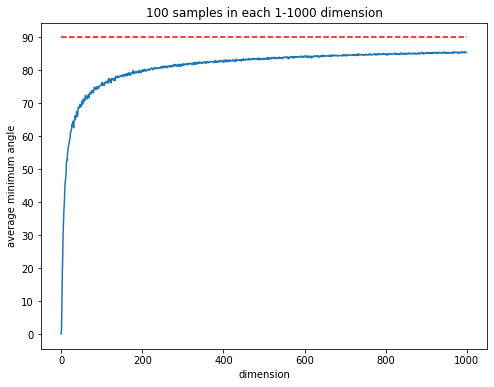

In [4]:
import matplotlib.pyplot as plt

# function: get a list of average minimum of angles from 1 to d dimension with n samples
# parameter: n, number of samples; d, dimension of samples
# return: get a list of average minimum of angles, d
def get_average_minimum_list(n,d):
    average_angle_list=[]
    for i in range(d):
        temp_samples = np.random.uniform(-1,1,size=(n,i+1))# generate n samples with 1-d dimension
        average_angle_list.append(get_average_minimum_of_angle(temp_samples))
    return average_angle_list


average_angle_list=get_average_minimum_list(100,1000)# get list of angles with 100 samples in each 1-1000 dimension 
# plot of the results
plt.figure(num=1,figsize=(8,6))
plt.plot(range(0,len(average_angle_list)), average_angle_list)
plt.title("100 samples in each 1-1000 dimension")
plt.xlabel("dimension")
plt.yticks(np.arange(0,95,10))
plt.ylabel("average minimum angle")
plt.hlines(90, 0, 1000, colors = "r", linestyles = "dashed")
plt.show()

* As the dimension increases, the average minimum angle between two randomly sampled vectors is approaching 90°. The higher the dimension of the space is, the higher the probability is, that the minimum angle between two randomly sampled vectors is close to 90°. 

* The increase in sample size results in a more consistent value of the average minimum angle, as shown in the plots below. In other words, the increase in sample size leads to the decrease in variance of the average minimum angle. Furthermore, the increase of the sample size will slightly increase the speed of convergence of the average minimum angle towards 90°.

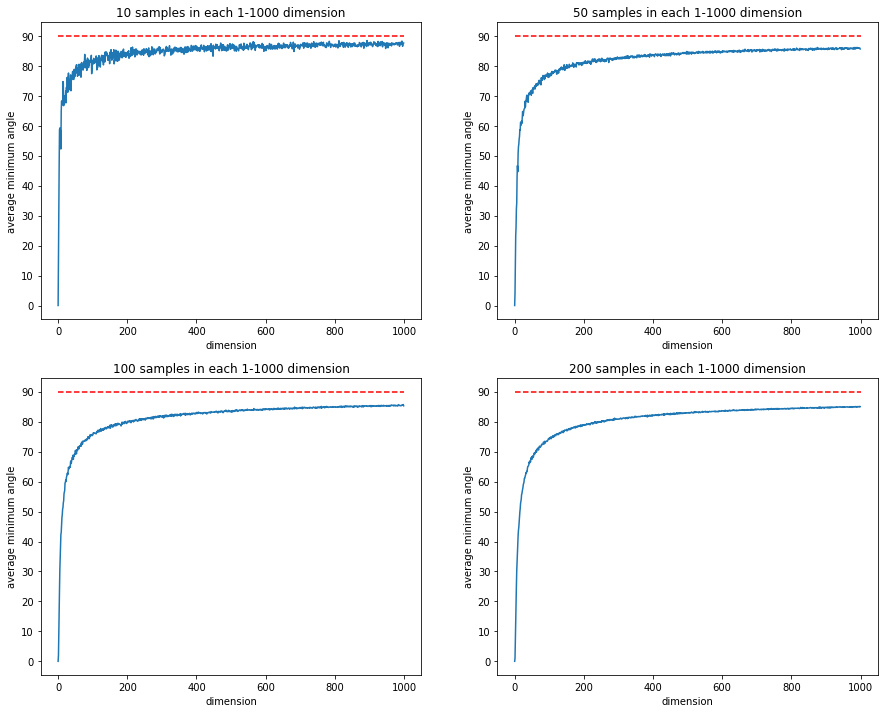

In [5]:

# Controlled experiments containing 10, 50 100 and 200 samples respectively. Each group of samples are from 1-1000 dimension(s)

list_sample_10=get_average_minimum_list(10,1000)
list_sample_20=get_average_minimum_list(50,1000)
list_sample_50=get_average_minimum_list(100,1000)
list_sample_100=get_average_minimum_list(200,1000)

plt.figure(num=2,figsize=(15,12))
plt.subplot(221)
plt.plot(range(0,len(list_sample_10)), list_sample_10)
plt.title("10 samples in each 1-1000 dimension")
plt.xlabel("dimension")
plt.yticks(np.arange(0,95,10))
plt.ylabel("average minimum angle")
plt.hlines(90, 0, 1000, colors = "r", linestyles = "dashed")

plt.subplot(222)
plt.plot(range(0,len(list_sample_20)), list_sample_20)
plt.title("50 samples in each 1-1000 dimension")
plt.xlabel("dimension")
plt.yticks(np.arange(0,95,10))
plt.ylabel("average minimum angle")
plt.hlines(90, 0, 1000, colors = "r", linestyles = "dashed")

plt.subplot(223)
plt.plot(range(0,len(list_sample_50)), list_sample_50)
plt.title("100 samples in each 1-1000 dimension")
plt.xlabel("dimension")
plt.yticks(np.arange(0,95,10))
plt.ylabel("average minimum angle")
plt.hlines(90, 0, 1000, colors = "r", linestyles = "dashed")

plt.subplot(224)
plt.plot(range(0,len(list_sample_100)), list_sample_100)
plt.title("200 samples in each 1-1000 dimension")
plt.xlabel("dimension")
plt.yticks(np.arange(0,95,10))
plt.ylabel("average minimum angle")
plt.hlines(90, 0, 1000, colors = "r", linestyles = "dashed")


plt.show()

### Task 3
* Yes, because $\sum_{x,y}P_{x,y}(x,y)=0.4+0.14+0.05+0.02+0.26+0.13=1$
  <br/>

* $ E_{y\mid x=2} [y] = \sum_y y P_{y\mid x=2} (y)  $ 
  $ = \sum_y y \frac {P_{x,y}(x=2,y)}{P_{x=2}}$
  $ = \frac{1}{0.59} (1*0.4+2*0.14+3*0.05) \approx 1,407$
  $ P_{x\mid y}(x=1\mid y=3)=\frac{P_{x,y}(1,3)}{P_y(3)} = \frac{0.13}{0.05+0.13} = 0.72$ 
  <br/>
  
* $ \int\limits_0^\frac{1}{2}\int\limits_0^1 P_{x,y}(x,y) \ dxdy = \int\limits_0^\frac{1}{2}\int\limits_0^1 1 \ dxdy = \frac{1}{2}*1 = \frac{1}{2} \neq 1$ <br>$\Longrightarrow P_{x,y}(x,y)$ is not a joint density function.<br/>
  <br/>

* $P_y = \begin{cases}\int\limits_0^y P_{x,y}(x,y) \ dx &,0\le y\\ 0 & otherwise\end{cases} $<br/>
    $ \quad=\begin{cases}\int\limits_0^y 2 e^{-(x+y)} \ dx &,0\le y\\ 0 & otherwise\end{cases} $<br/>
    $ \quad=\begin{cases}2 e^{-y}[-e^{-x}]_0^y &,0\le y\\ 0 & otherwise\end{cases} $<br/>
    $ \quad=\begin{cases}2 e^{-y} (1-e^{-y}) &,0\le y\\ 0 & otherwise\end{cases} $<br/>
    
  $P_x = \begin{cases}\int\limits_x^{+\infty} P_{x,y}(x,y) \ dy &,0\le x\\ 0 & otherwise\end{cases} $<br/>
    $ \quad=\begin{cases}2 e^{-x}[-e^{-y}]_x^{+\infty} &,0\le x\\ 0 & otherwise\end{cases} $<br/>
    $ \quad=\begin{cases}2 e^{-2x} &,0\le x\\ 0 & otherwise\end{cases} $<br/>
  <br/>

* $P_{x\mid y}(x\le 2\mid y=\frac{1}{2}) = \frac{P_{x,y}(x\le2,y=\frac{1}{2})}{P_y(y=\frac{1}{2})}$ <br/>
    $ P_y(y) = \begin{cases}\int\limits_0^3 P_{x,y}(x,y) \ dx & ,0<y<1\\ 0 & otherwise\end{cases} =  \begin{cases}\int\limits_0^3 \frac{1}{15} (2x+4y) \ dx & ,0<y<1 \\ 0 & otherwise \end{cases} = \begin{cases}[\frac{x^2+4xy}{15}]_0^3 & ,0<y<1 \\ 0 & otherwise \end{cases} = \begin{cases}[\frac{9+12y}{15}] & ,0<y<1 \\ 0 & otherwise \end{cases}$ <br/>
  
  $P_y(\frac{1}{2} = \frac{9+6}{15}) = 1$   <br/>
  
  $P_{x,y}(x\le 2\mid y=\frac{1}{2}) = \int\limits_0^2 \frac{1}{15} (2x+4*\frac{1}{2}) \ dx = [\frac{x^2+2x}{15}]_0^2 = \frac{8}{15}$ <br/>
  $ \Longrightarrow P_{x\mid y}(x\le 2\mid y=\frac{1}{2}) = \frac{8}{15}$


$
\DeclareMathOperator{\Prob}{Pr}
\renewcommand{\vec}[1]{{\underline{#1}}}
\newcommand{\dott}[2]{{{#1}^T{#2}}}
\newcommand{\mat}[1]{{\mathbf{#1}}}
$

### Task 4

Show that the covariance matrix $C$ of any random variable $X\in\mathbb{R}^p$ (random vector) is symmetric $\textbf{(1)}$ positive semidefinite $\textbf{(2)}$. 

The covariance matrix $C$ is defined via: 

$\begin{equation}
C=E[(X−\mu)(X−\mu)^T] = E
 \begin{pmatrix}
  (X_1-\mu_1)^2 & (X_1-\mu_1)(X_2-\mu_2) & \cdots & (X_1-\mu_1)(X_p-\mu_p) \\
  (X_2-\mu_2)(X_1-\mu_1) & (X_2-\mu_2)^2 & \cdots & (X_2-\mu_2)(X_p-\mu_p) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  (X_p-\mu_p)(X_1-\mu_1) & (X_p-\mu_p)(X_2-\mu_2) & \cdots & (X_p-\mu_p)^2 
 \end{pmatrix}
\end{equation}$

$E[.]$ denotes the expectation and $\mu$ the mean vector for a given random vector. There are now two properties that have to be shown:

$\textbf{(1)}$ The symmetry of the covariance matrix $C$:

The equation above can also be written as follows: 

$\begin{equation}
C= E
 \begin{pmatrix}
  \text{Var}(X_1) &\text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_p) \\
  \text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_2) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \text{Cov}(X_p,X_1) & \text{Cov}(X_p,X_2) & \cdots & \text{Var}(X_p) 
 \end{pmatrix}
\end{equation}$

Var(.) denotes the variance of a random variable with itself and Cov(.) the covariance of two random variables. Since the covariance of two random variables is symmetric, e.g. $\text{Cov}(X_i,X_j)$ = $\text{Cov}(X_j,X_i)$, the above equation can be rewritten as

$\begin{equation}
C= E
 \begin{pmatrix}
  \text{Var}(X_1) &\text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_p) \\
  \text{Cov}(X_1,X_2) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_2) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \text{Cov}(X_1,X_p) & \text{Cov}(X_2,X_p) & \cdots & \text{Var}(X_p) 
 \end{pmatrix}
\end{equation}$

and thus one can derive that the covariance matrix of a random variable $X\in\mathbb{R}$ is symmetric, e.g. $C = C^T$. $\Box$

Note: Cov($X_j,X_j$) = Var($X_j$)


$\textbf{(2)}$ The covariance matrix $C$ is positive semidefinite:

Any covariance matrix $C\in\mathbb{R}^{pxp}$ is positive semidefinite if the inequality

$\begin{equation}
x^TCx\geq 0
\end{equation}$

holds for any $x\in\mathbb{R}^p$.




Since the expectation operator is linear one can write:

$\begin{equation}
x^TE[(X−\mu)(X−\mu)^T]x = E[x^T(X−\mu)(X−\mu)^Tx]
\end{equation}$

Using $(aA)^T = A^Ta^T$ gives the following: 
$\begin{equation}
E[x^T(X−\mu)(X−\mu)^Tx]=E[((X−\mu)^Tx)^T(X−\mu)^Tx]=E[\Vert{(X−\mu)^Tx\|}^2]
\end{equation}$

The latter is greater than or equal to zero, e.g. 
$\begin{equation}
E[\Vert{(X−\mu)^Tx\|}]\geq0   
\end{equation}$ 
and the claim $\textbf{(2)}$ holds. $\Box$